# Cross Sell Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(381109, 12)

In [6]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
train = df.copy()

# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


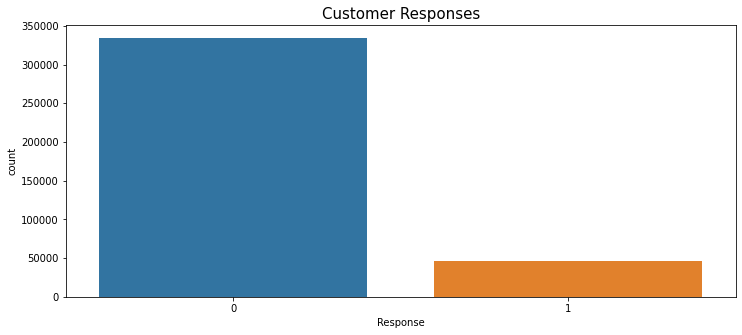

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(train['Response'])
plt.title('Customer Responses', fontsize=15)
plt.show()

Calculating positive and negative samples in percentages

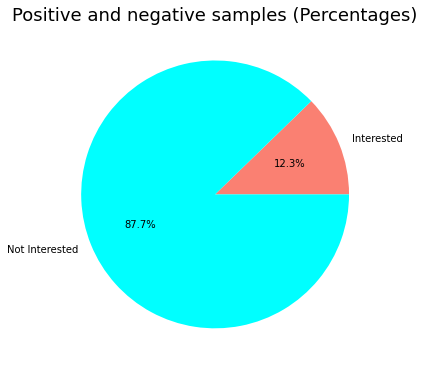

In [15]:
positive_percent = len(train[train['Response']==1])/len(df)*100
negative_percent = len(train[train['Response']==0])/len(df)*100

percentages = [positive_percent, negative_percent]

plt.figure(figsize=(6,8))
plt.pie(percentages, labels=['Interested', 'Not Interested'], autopct='%.1f%%', colors=['salmon', 'cyan'])
plt.title('Positive and negative samples (Percentages)', fontsize=18)
plt.show()

This states that the dataset is highly imbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


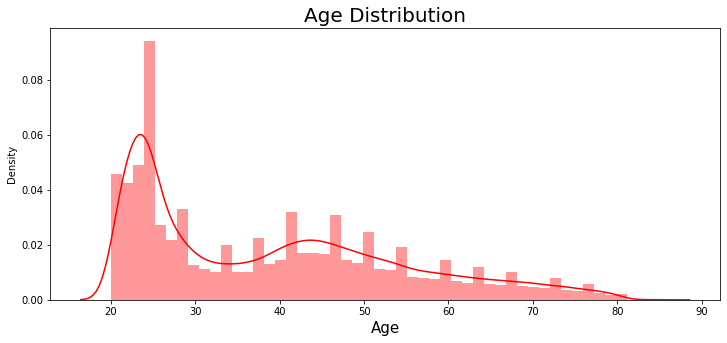

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(train['Age'], kde=True, color='Red')
plt.xlabel('Age', fontsize=15)
plt.title('Age Distribution', fontsize=20)
plt.show()

Gender Classification

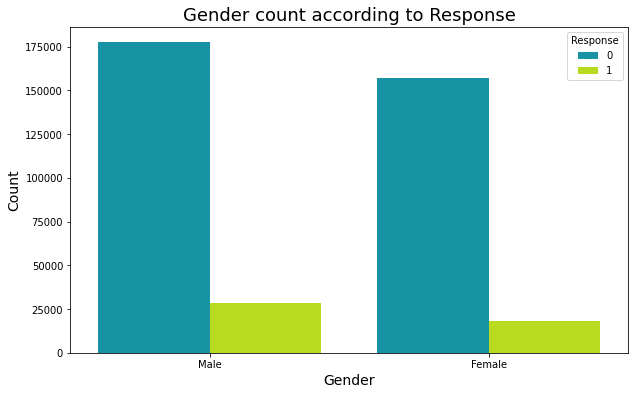

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Gender', hue='Response', palette='nipy_spectral')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Gender count according to Response', fontsize=18)
plt.show()

How many Customers have a driving license?

In [19]:
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


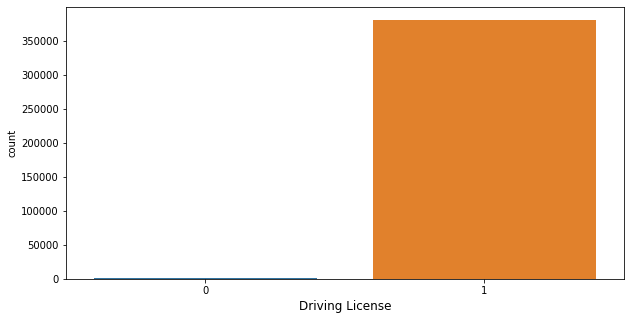

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(train['Driving_License'])
plt.xlabel('Driving License', fontsize=12)
plt.show()

Age of vehicles already owned by customers and analyzing the responses of customers towards new vehicle insurance

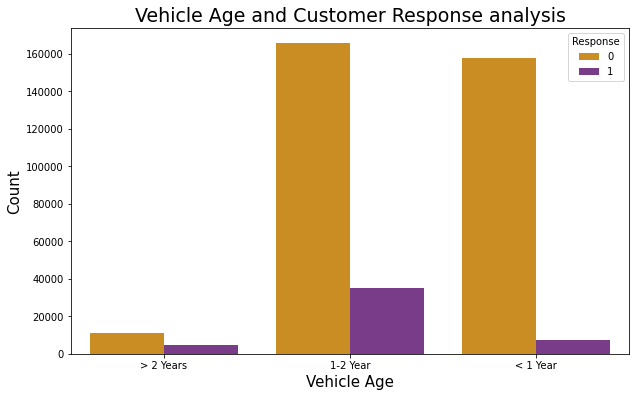

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Vehicle_Age', hue='Response', palette='CMRmap_r')
plt.xlabel('Vehicle Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Vehicle Age and Customer Response analysis', fontsize=19)
plt.show()

Customers that have vehicles between 1 and 2 years have shown interest in getting vehicle insurance

let's see if the vehicles that are between 1 and 2 years got damaged or not.

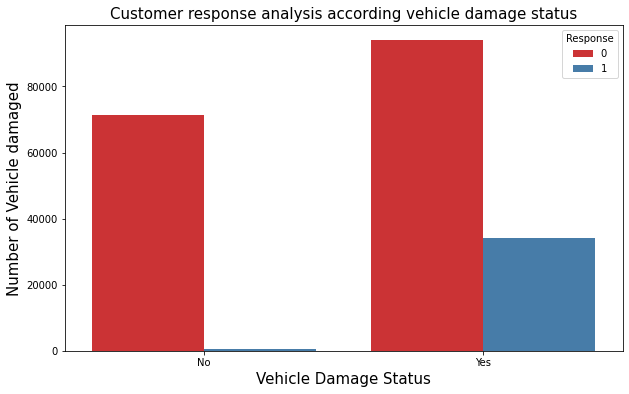

In [23]:
vehicles = train[train["Vehicle_Age"]=='1-2 Year']

plt.figure(figsize=(10,6))
sns.countplot(data=vehicles, x='Vehicle_Damage', hue='Response', palette='Set1')
plt.xlabel('Vehicle Damage Status', fontsize=15)
plt.ylabel('Number of Vehicle damaged', fontsize=15)
plt.title('Customer response analysis according vehicle damage status', fontsize=15)
plt.show()

Having damaged vehicle, Customers tent to purchase a vehicle insurance

Annual Premium Distribution

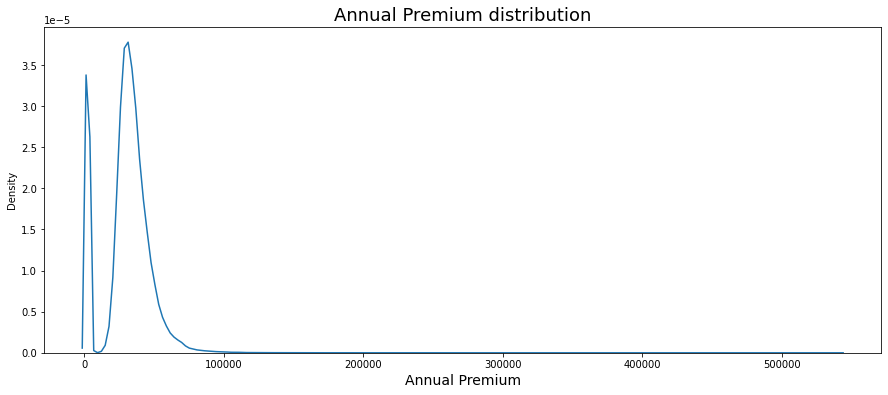

In [25]:
plt.figure(figsize=(15,6))
sns.kdeplot(train['Annual_Premium'])
plt.xlabel('Annual Premium', fontsize=14)
plt.title('Annual Premium distribution', fontsize=18)
plt.show()

Policy Sales Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


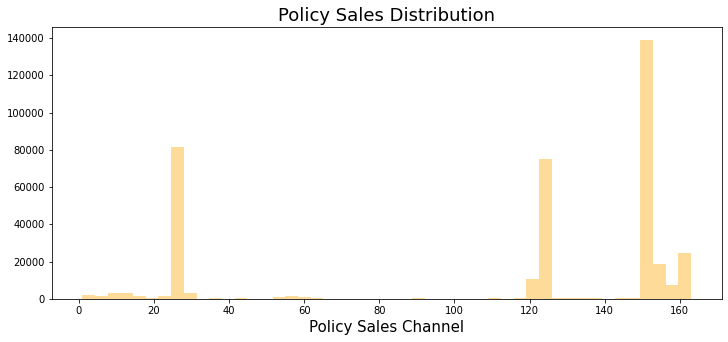

In [26]:
plt.figure(figsize=(12,5))
sns.distplot(train['Policy_Sales_Channel'], kde=False, color='orange')
plt.xlabel('Policy Sales Channel', fontsize=15)
plt.title('Policy Sales Distribution', fontsize=18)
plt.show()

2 clusters can be seen here, so we can divide the data into categorical data and one-hot encode them

Region Code Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


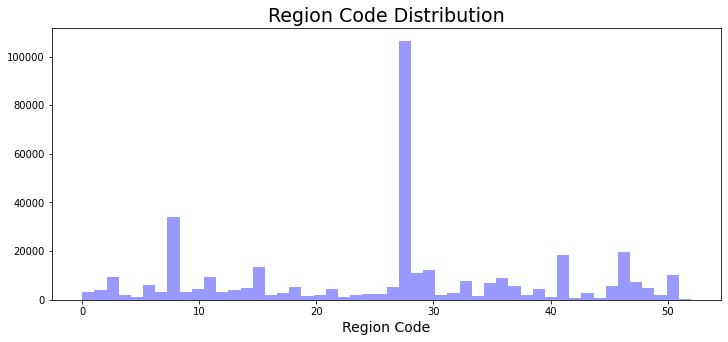

In [27]:
plt.figure(figsize=(12,5))
sns.distplot(train['Region_Code'], kde=False, color='blue')
plt.xlabel('Region Code', fontsize=14)
plt.title('Region Code Distribution', fontsize=19)
plt.show()

region code can be divided into 3 different categories

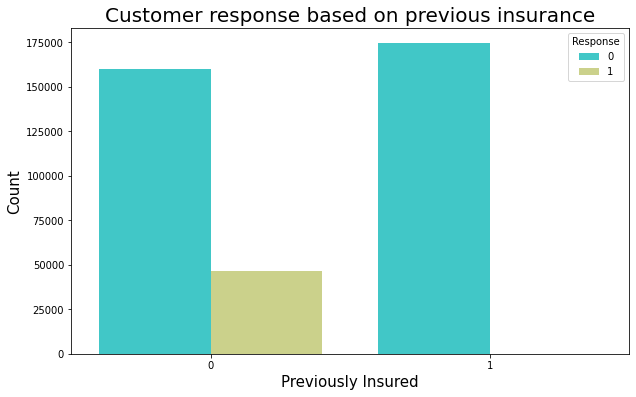

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Previously_Insured', hue='Response', palette='rainbow')
plt.xlabel('Previously Insured', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Customer response based on previous insurance', fontsize=20)
plt.show()

As expected, Customers who already have an insurance are not willing to buy a new one, eventually a burden for them

Correlation Heatmap

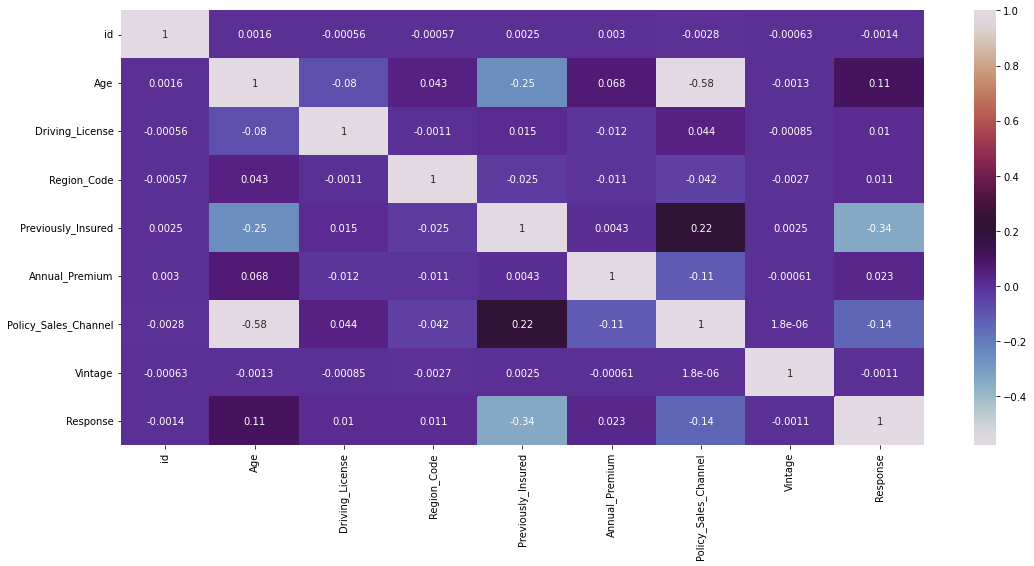

In [29]:
plt.figure(figsize=(18,8))
sns.heatmap(train.corr(), cmap='twilight', annot=True)
plt.show()

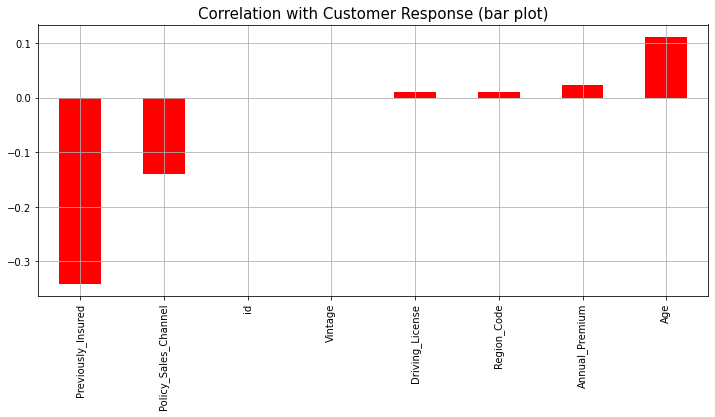

In [33]:
plt.figure(figsize=(12,5))
train.corrwith(train['Response']).sort_values().drop('Response').plot(kind='bar', color='red')
plt.title('Correlation with Customer Response (bar plot)', fontsize=15)
plt.grid()
plt.show()